In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import load_img,ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras import Sequential,callbacks
from keras.models import load_model
from keras.regularizers import l2
from keras.layers import Conv2D,Convolution2D, MaxPooling2D,MaxPool2D, Flatten, Dense,BatchNormalization,Dropout,Activation
from keras.optimizers import Adam,SGD
#from keras.callbacks import ReduceLROnPlateau

2024-05-14 23:56:07.462217: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 23:56:07.895920: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 23:56:07.896091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 23:56:07.936036: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-14 23:56:08.202966: I tensorflow/core/platform/cpu_feature_guar

In [2]:
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"

In [3]:
InputPath = []
label = []
source_file_dir = os.path.dirname(os.path.abspath("__file__"))
print(source_file_dir)
for Class in os.listdir(os.path.join(source_file_dir,"WasteClasses")):
    print(Class)
    for path in os.listdir(os.path.join(source_file_dir,"WasteClasses",Class)):
        if Class == "Food Organics":
                label.append(0)
        elif Class =="Metal":
                label.append(1)
        else:
                label.append(2)
                
        InputPath.append(os.path.join("WasteClasses", Class, path))
        

print(label)


/home/abdulrahman/Projects/Waste
Metal
Plastic
Food Organics
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [4]:
df = pd.DataFrame()
df['images'] = InputPath
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,WasteClasses/Plastic/Plastic_418.jpg,2
1,WasteClasses/Metal/Metal_298.jpg,1
2,WasteClasses/Metal/Metal_402.jpg,1
3,WasteClasses/Metal/Metal_100.jpg,1
4,WasteClasses/Plastic/Plastic_304.jpg,2


<Axes: xlabel='label', ylabel='count'>

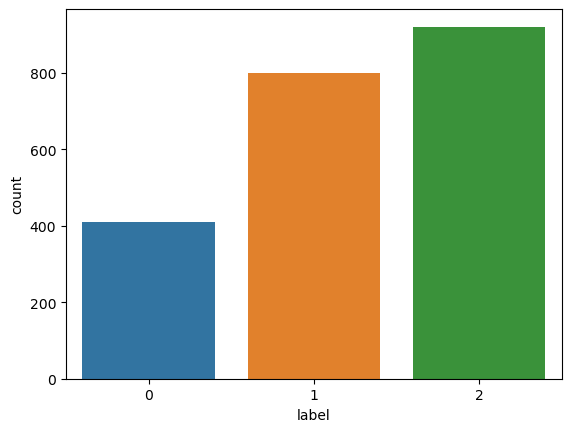

In [5]:
import seaborn as sns
sns.countplot(data=df,x='label')

In [6]:
df

,images,label
0,WasteClasses/Plastic/Plastic_418.jpg,2
1,WasteClasses/Metal/Metal_298.jpg,1
2,WasteClasses/Metal/Metal_402.jpg,1
3,WasteClasses/Metal/Metal_100.jpg,1
4,WasteClasses/Plastic/Plastic_304.jpg,2
...,...,...
2126,WasteClasses/Metal/Metal_203.jpg,1
2127,WasteClasses/Food Organics/Food Organics_353.jpg,0
2128,WasteClasses/Metal/Metal_198.jpg,1
2129,WasteClasses/Plastic/Plastic_612.jpg,2


In [7]:
df['label'] = df['label'].astype('str')

In [8]:
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [9]:
TrainGenerator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
)
ValGenerator = ImageDataGenerator(rescale = 1./255)

TrainIterator = TrainGenerator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(224,224), 
    batch_size=64, 
    class_mode='categorical',
    shuffle=True
)
ValIterator = ValGenerator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(224,224), 
    batch_size=64, 
    class_mode='categorical',
    shuffle=True
)

Found 1704 validated image filenames belonging to 3 classes.
Found 427 validated image filenames belonging to 3 classes.


In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(3)) # output
model.add(Activation("softmax"))


2024-05-14 23:56:19.162985: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-14 23:56:21.730178: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-14 23:56:21.730282: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-14 23:56:21.736715: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-14 23:56:21.736802: I external/local_xla/xla/stream_executor

In [11]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
              , loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [12]:
history = model.fit(TrainIterator, epochs=100
                    , validation_data=ValIterator
                    ,class_weight={0:1.56816,1:1.4872,2:0.69575})


Epoch 1/100


2024-05-14 23:56:55.050225: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-05-14 23:57:33.357928: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-14 23:58:34.310880: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-14 23:58:40.630501: I external/local_xla/xla/service/service.cc:168] XLA service 0x7efa31608bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-14 23:58:40.630573: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
I0000 00:00:1715720322.686476   34641 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


27/27 [==============================] - 182s 1s/step - loss: 1.2234 - accuracy: 0.3803 - val_loss: 1.0465 - val_accuracy: 0.3770
Epoch 2/100
27/27 [==============================] - 51s 2s/step - loss: 1.1708 - accuracy: 0.4331 - val_loss: 0.8984 - val_accuracy: 0.5363
Epoch 3/100
27/27 [==============================] - 55s 2s/step - loss: 1.0441 - accuracy: 0.4695 - val_loss: 0.7864 - val_accuracy: 0.5995
Epoch 4/100
27/27 [==============================] - 77s 3s/step - loss: 1.0188 - accuracy: 0.4695 - val_loss: 0.7838 - val_accuracy: 0.6019
Epoch 5/100
27/27 [==============================] - 45s 2s/step - loss: 0.9945 - accuracy: 0.4847 - val_loss: 1.0441 - val_accuracy: 0.4379
Epoch 6/100
27/27 [==============================] - 37s 1s/step - loss: 1.0410 - accuracy: 0.4660 - val_loss: 1.0398 - val_accuracy: 0.3864
Epoch 7/100
27/27 [==============================] - 39s 1s/step - loss: 0.9930 - accuracy: 0.4695 - val_loss: 0.8190 - val_accuracy: 0.5878
Epoch 8/100
27/27 [=====

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
print(acc)
print(val_acc)

[0.3802816867828369, 0.43309858441352844, 0.46948355436325073, 0.46948355436325073, 0.48474177718162537, 0.4659624397754669, 0.46948355436325073, 0.5715962648391724, 0.6091549396514893, 0.6062206625938416, 0.6273474097251892, 0.6021126508712769, 0.6062206625938416, 0.6343896985054016, 0.6672534942626953, 0.6889671087265015, 0.704812228679657, 0.6924882531166077, 0.70363849401474, 0.7142018675804138, 0.7188966870307922, 0.7312206625938416, 0.7458920478820801, 0.7482394576072693, 0.7429577708244324, 0.7464788556098938, 0.7341549396514893, 0.7353286147117615, 0.7593896985054016, 0.7617371082305908, 0.7505868673324585, 0.7652581930160522, 0.7793427109718323, 0.7752347588539124, 0.7693662047386169, 0.7728873491287231, 0.7852112650871277, 0.7899060845375061, 0.7910798192024231, 0.7887324094772339, 0.79636150598526, 0.7987089157104492, 0.797535240650177, 0.8045774698257446, 0.7764084339141846, 0.8022300601005554, 0.8116196990013123, 0.8110328912734985, 0.8151408433914185, 0.8204225301742554, 

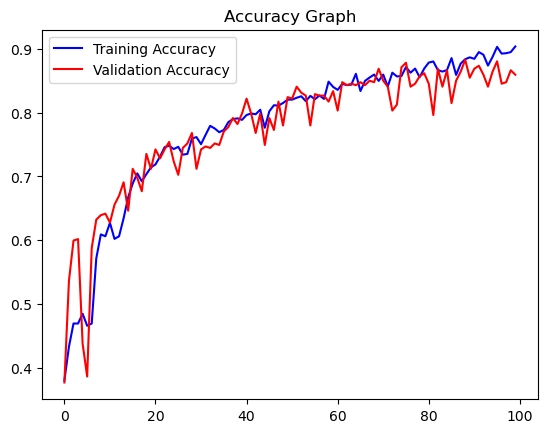

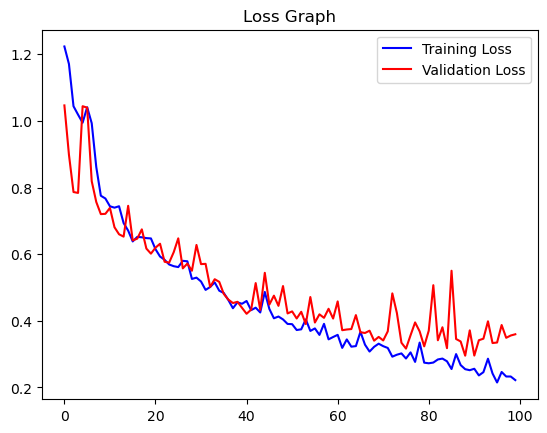

In [14]:
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [15]:
model.save("Waste35.h5")
model.save("Waste35.keras")


/home/abdulrahman/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
